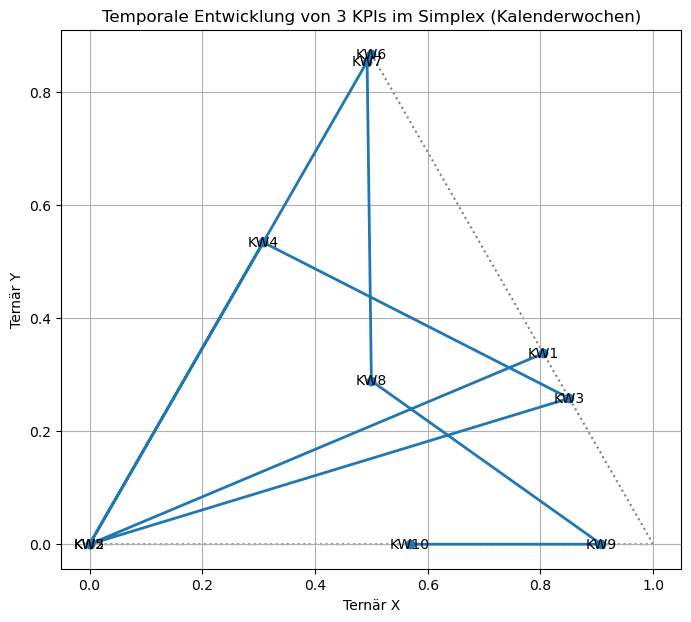

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.tri import Triangulation
## Prüfungsrelevant Schritt 1, 2 und 3 !!
# Schritt 1: Simuliere zeitabhängige KPI-Daten
# Wir verwenden 3 KPIs: Produktion, Energieverbrauch, Maschinenausfall
# Die Daten werden zufällig generiert für 10 Zeitpunkte (z.B. 10 Kalenderwochen)
np.random.seed(42)
zeitpunkte = 10
kpis = ["Produktion", "Energieverbrauch", "Maschinenausfall"]
data = np.random.rand(zeitpunkte, len(kpis)) * [1000, 500, 50]
df = pd.DataFrame(data, columns=kpis)

# Schritt 2: Standardisierung der Daten (z-Score) auf N(0,1)
scaler = StandardScaler()
standardisierte_daten = scaler.fit_transform(df)

# Schritt 3: Projektion der Daten in den Simplex
# Ziel: Alle Werte >= 0, und jede Zeile (Zeitpunkt) soll sich zu 1 aufsummieren
def simplex_projection(v):
    """Projektion eines Vektors v in den Simplex (Summe = 1, keine negativen Werte)"""
    v = np.maximum(v, 0)  # Negative Werte werden auf 0 gesetzt
    if np.sum(v) == 0:
        return np.ones_like(v) / len(v)  # Falls alles 0 ist: gleichmäßig verteilen
    return v / np.sum(v)  # Normiere so, dass Summe 1 ergibt

# Wende die Simplex-Projektion auf jede Zeile der standardisierten Daten an
simplex_daten = np.apply_along_axis(simplex_projection, 1, standardisierte_daten)

# Schritt 4: Umrechnung in 2D-Koordinaten für Ternär-Diagramm
# Damit lassen sich die 3-dimensionalen KPIs als Punkte im 2D-Dreieck (Simplex) darstellen
def ternary_coordinates(data):
    """Berechne die 2D-Koordinaten für Ternärplot (Simplex)"""
    A, B, C = data[:, 0], data[:, 1], data[:, 2]
    x = 0.5 * (2*B + C) / (A + B + C)
    y = (np.sqrt(3)/2) * C / (A + B + C)
    return x, y

x_coords, y_coords = ternary_coordinates(simplex_daten)

# Schritt 5: Visualisierung im Simplex mit Kalenderwochen-Beschriftung
# Erzeuge Kalenderwochen-Labels: KW1, KW2, ..., KW10
kw_labels = [f"KW{i+1}" for i in range(len(x_coords))]

# Erstelle den Plot
plt.figure(figsize=(8, 7))
plt.plot(x_coords, y_coords, marker='o', linestyle='-', linewidth=2)

# Beschrifte jeden Punkt mit der zugehörigen Kalenderwoche
for label, x, y in zip(kw_labels, x_coords, y_coords):
    plt.text(x, y, label, fontsize=10, ha='center', va='center')

# Zeichne das Simplex-Dreieck zur Orientierung
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
tri = Triangulation(triangle[:, 0], triangle[:, 1])
plt.triplot(tri, color="gray", linestyle='dotted')

# Achsen und Titel setzen
plt.title("Temporale Entwicklung von 3 KPIs im Simplex (Kalenderwochen)")
plt.xlabel("Ternär X")
plt.ylabel("Ternär Y")
plt.grid(True)
plt.axis('equal')
plt.show()
